In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")


RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
train_data = pd.read_csv(r"D:\1_titanic\train.csv")
test_data = pd.read_csv(r"D:\1_titanic\test.csv")  

In [3]:
def preprocess_data(data):

    data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

    data["Sex"] = data["Sex"].map({"male": 0, "female": 1})


    data["Age"].fillna(data["Age"].median(), inplace=True)
    data["Fare"].fillna(data["Fare"].median(), inplace=True)

    
    data["Embarked"] = data["Embarked"].map({"C": 0, "Q": 1, "S": 2})
    data["Embarked"].fillna(2, inplace=True) 
    data = (data - data.min()) / (data.max() - data.min())

    return data

train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)


X_train = train_data.drop(columns=["Survived"]).values  # ویژگی‌ها
y_train = train_data["Survived"].values.reshape(-1, 1)  # خروجی موردنظر


X_test = test_data.values


In [4]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backward(self, X, y, output):
        error = y - output
        d_output = error * self.sigmoid_derivative(output)
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)

        self.W2 += np.dot(self.a1.T, d_output) * self.learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, d_hidden) * self.learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs=5000):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            if epoch % 500 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
        return losses

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)


In [5]:
input_size = X_train.shape[1]
hidden_size = 12
output_size = 1
learning_rate = 0.05

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
losses = nn.train(X_train, y_train, epochs=20000)


Epoch 0: Loss = 0.5141
Epoch 500: Loss = 0.1348
Epoch 1000: Loss = 0.1264
Epoch 1500: Loss = 0.1227
Epoch 2000: Loss = 0.1217
Epoch 2500: Loss = 0.1208
Epoch 3000: Loss = 0.1198
Epoch 3500: Loss = 0.1187
Epoch 4000: Loss = 0.1178
Epoch 4500: Loss = 0.1171
Epoch 5000: Loss = 0.1166
Epoch 5500: Loss = 0.1162
Epoch 6000: Loss = 0.1159
Epoch 6500: Loss = 0.1156
Epoch 7000: Loss = 0.1153
Epoch 7500: Loss = 0.1151
Epoch 8000: Loss = 0.1149
Epoch 8500: Loss = 0.1147
Epoch 9000: Loss = 0.1145
Epoch 9500: Loss = 0.1141
Epoch 10000: Loss = 0.1136
Epoch 10500: Loss = 0.1129
Epoch 11000: Loss = 0.1124
Epoch 11500: Loss = 0.1118
Epoch 12000: Loss = 0.1110
Epoch 12500: Loss = 0.1104
Epoch 13000: Loss = 0.1099
Epoch 13500: Loss = 0.1094
Epoch 14000: Loss = 0.1090
Epoch 14500: Loss = 0.1086
Epoch 15000: Loss = 0.1083
Epoch 15500: Loss = 0.1079
Epoch 16000: Loss = 0.1076
Epoch 16500: Loss = 0.1073
Epoch 17000: Loss = 0.1071
Epoch 17500: Loss = 0.1069
Epoch 18000: Loss = 0.1066
Epoch 18500: Loss = 0.106

In [6]:
y_pred_train = nn.predict(X_train)
accuracy = np.mean(y_pred_train == y_train)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 86.08%


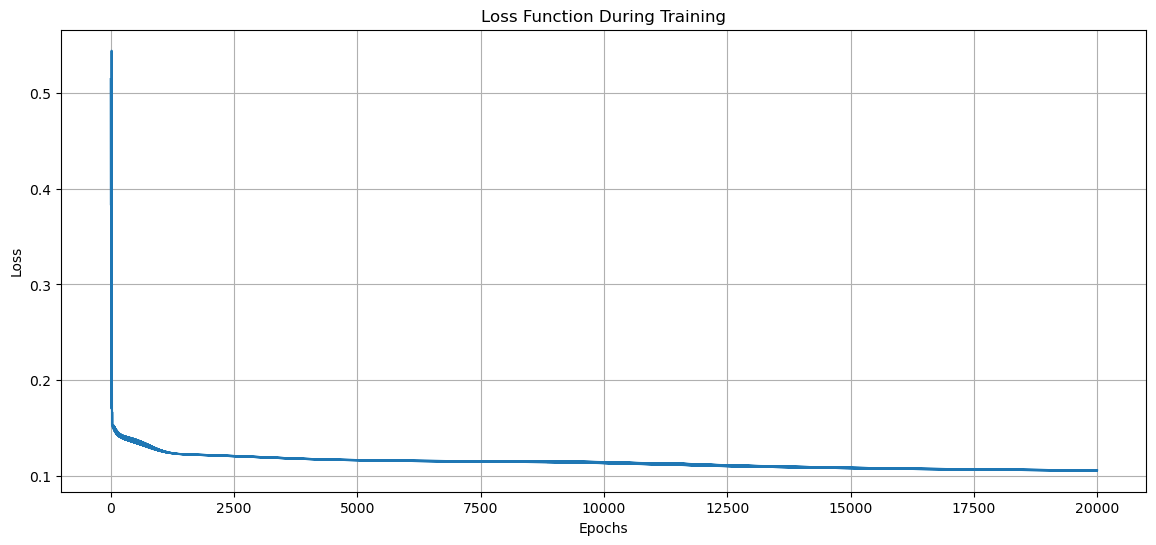

In [7]:
# Plotting the Loss Function

plt.figure(figsize=(14, 6))

plt.plot(losses)
plt.title("Loss Function During Training")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [8]:
# Making predictions on the test data
y_pred_test = nn.predict(X_test)

# Saving the predictions to a CSV file
output = pd.DataFrame({"PassengerId": pd.read_csv(r"D:\1_titanic\test.csv")["PassengerId"], "Survived": y_pred_test.flatten()})
output.to_csv("submission.csv", index=False)

print("✅ Predictions saved! The submission.csv file is ready.")


✅ Predictions saved! The submission.csv file is ready.
